<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Trajectories-Analysis" data-toc-modified-id="Trajectories-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Trajectories Analysis</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Resampling" data-toc-modified-id="Resampling-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Resampling</a></span></li></ul></li></ul></li><li><span><a href="#General-Analysis" data-toc-modified-id="General-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>General Analysis</a></span><ul class="toc-item"><li><span><a href="#Exploration-of-arena" data-toc-modified-id="Exploration-of-arena-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Exploration of arena</a></span></li><li><span><a href="#Speed-and-Acceleration" data-toc-modified-id="Speed-and-Acceleration-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Speed and Acceleration</a></span><ul class="toc-item"><li><span><a href="#Speed" data-toc-modified-id="Speed-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Speed</a></span></li><li><span><a href="#Acceleration" data-toc-modified-id="Acceleration-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Acceleration</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Statistics</a></span></li></ul></li></ul></li><li><span><a href="#Focal-Analysis" data-toc-modified-id="Focal-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Focal Analysis</a></span><ul class="toc-item"><li><span><a href="#Heat-Maps-for-Positions,-Turn-and-Accelerations" data-toc-modified-id="Heat-Maps-for-Positions,-Turn-and-Accelerations-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Heat Maps for Positions, Turn and Accelerations</a></span><ul class="toc-item"><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Statistics</a></span></li></ul></li><li><span><a href="#Interindividual-Distances" data-toc-modified-id="Interindividual-Distances-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Interindividual Distances</a></span><ul class="toc-item"><li><span><a href="#Overall-IID" data-toc-modified-id="Overall-IID-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Overall IID</a></span></li><li><span><a href="#Analysis-over-time:-Split-IID" data-toc-modified-id="Analysis-over-time:-Split-IID-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Analysis over time: Split IID</a></span></li><li><span><a href="#Raincloud-for-average-distances-distances" data-toc-modified-id="Raincloud-for-average-distances-distances-1.3.2.3"><span class="toc-item-num">1.3.2.3&nbsp;&nbsp;</span>Raincloud for average distances distances</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.3.2.4"><span class="toc-item-num">1.3.2.4&nbsp;&nbsp;</span>Statistics</a></span></li></ul></li><li><span><a href="#Alignment" data-toc-modified-id="Alignment-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Alignment</a></span><ul class="toc-item"><li><span><a href="#Overall-Alignment" data-toc-modified-id="Overall-Alignment-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Overall Alignment</a></span></li><li><span><a href="#Analysis-over-time" data-toc-modified-id="Analysis-over-time-1.3.3.2"><span class="toc-item-num">1.3.3.2&nbsp;&nbsp;</span>Analysis over time</a></span></li><li><span><a href="#Raincloud-for-ratio-of-alignment" data-toc-modified-id="Raincloud-for-ratio-of-alignment-1.3.3.3"><span class="toc-item-num">1.3.3.3&nbsp;&nbsp;</span>Raincloud for ratio of alignment</a></span></li><li><span><a href="#Correlation:-speed-vs.-alignment-AND-Statistics" data-toc-modified-id="Correlation:-speed-vs.-alignment-AND-Statistics-1.3.3.4"><span class="toc-item-num">1.3.3.4&nbsp;&nbsp;</span>Correlation: speed vs. alignment AND Statistics</a></span></li></ul></li><li><span><a href="#Structure-of-Trajectories" data-toc-modified-id="Structure-of-Trajectories-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Structure of Trajectories</a></span></li></ul></li></ul></li></ul></div>

# Trajectories Analysis

Groups: 
dp- DMSO Positive
dn- DMSO Negative
mp- MTZ Positive
mn- MTZ Negative

In [1]:
import os
import glob
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pprint import pprint
import seaborn as sns
sns.set()
sns.set_palette("colorblind")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from scipy.stats import pearsonr
import plotly.graph_objects as go
import ptitprince as pt
from trajectorytools.constants import dir_of_data
import trajectorytools as tt
import trajectorytools.geometry as ttgeometry
import trajectorytools.plot as ttplot
import trajectorytools.socialcontext as ttsocial
import pandas as pd
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Loading the data

Protocol: 48h incubation + 1h recovery -> 20 min videos <br> LIGHTS: Infrared and visible <br> NOTE: In these videos (Experiments_20190515), there was a mismatch on the framerate by a factor of 4. Therefore, we divided the framerate of these recordings by 4 (new_framerate = 15)

In [2]:
hd_path = '/media/renata/'

def trajectories_path(treatment, date):
    ''' 
This function returns the path to the trajectories of each recorded session.
'''
    if treatment == 'MTZ':
        paths_pos = glob.glob(os.path.join(hd_path,date,'Session_*','MTZ_Pos_*','session_*','trajectories_wo_gaps', 'trajectories_wo_gaps.npy'))
        paths_neg = glob.glob(os.path.join(hd_path,date,'Session_*','MTZ_Neg_*','session_*','trajectories_wo_gaps', 'trajectories_wo_gaps.npy'))
    elif treatment == 'DMSO':
        paths_pos = glob.glob(os.path.join(hd_path,date,'Session_*','DMSO_Pos_*','session_*','trajectories_wo_gaps', 'trajectories_wo_gaps.npy'))
        paths_neg = glob.glob(os.path.join(hd_path,date,'Session_*','DMSO_Neg_*','session_*','trajectories_wo_gaps', 'trajectories_wo_gaps.npy'))
    else:
        paths = glob.glob(os.path.join(hd_path,date,'Session_*','*','session_*','trajectories_wo_gaps', 'trajectories_wo_gaps.npy'))
    return paths_pos, paths_neg

date1 = 'Renata_data/Experiments_20190704'
date2 = 'Renata_data/Experiments_20190806'
date3 = 'Renata_data/Experiments_20190824'
date4 = 'Renata_data/Experiments_20190829'
date5 = 'Renata_data/Experiments_20190906'
date6 = 'Renata_data/Experiments_20190919'
date7 = 'renata_data_2/Experiments_20191005'
date8 = 'renata_data_2/Experiments_20191114'
date9 = 'renata_data_2/Experiments_20191204'
date10 = 'renata_data_2/Experiments_20191214'

path_mtz_pos = trajectories_path('MTZ',date1)[0] + trajectories_path('MTZ',date2)[0] + trajectories_path('MTZ',date3)[0] + trajectories_path('MTZ',date4)[0] + trajectories_path('MTZ',date5)[0] + trajectories_path('MTZ',date6)[0] + trajectories_path('MTZ',date7)[0] + trajectories_path('MTZ',date8)[0] + trajectories_path('MTZ',date9)[0] + trajectories_path('MTZ',date10)[0]
path_mtz_neg = trajectories_path('MTZ',date1)[1] + trajectories_path('MTZ',date2)[1] + trajectories_path('MTZ',date3)[1] + trajectories_path('MTZ',date4)[1] + trajectories_path('MTZ',date5)[1] + trajectories_path('MTZ',date6)[1] + trajectories_path('MTZ',date7)[1] + trajectories_path('MTZ',date8)[1] + trajectories_path('MTZ',date9)[1] + trajectories_path('MTZ',date10)[1]
path_dmso_pos = trajectories_path('DMSO',date1)[0] + trajectories_path('DMSO',date2)[0] + trajectories_path('DMSO',date3)[0] + trajectories_path('DMSO',date4)[0] + trajectories_path('DMSO',date5)[0] + trajectories_path('DMSO',date6)[0] + trajectories_path('DMSO',date7)[0] + trajectories_path('DMSO',date8)[0]  + trajectories_path('DMSO',date9)[0] + trajectories_path('DMSO',date10)[0]
path_dmso_neg = trajectories_path('DMSO',date1)[1] + trajectories_path('DMSO',date2)[1] + trajectories_path('DMSO',date3)[1] + trajectories_path('DMSO',date4)[1] + trajectories_path('DMSO',date5)[1] + trajectories_path('DMSO',date6)[1] + trajectories_path('DMSO',date7)[1] + trajectories_path('DMSO',date8)[1] + trajectories_path('DMSO',date9)[1] + trajectories_path('DMSO',date10)[1]

In [3]:
def load_data(paths):
    traj = []
    for path in paths:
        tr = tt.Trajectories.from_idtracker('{}'.format(path),smooth_params = {'sigma':1., 'only_past':False}).normalise_by('body_length')
        tr.new_time_unit(tr.params['frame_rate'], 'second')
        traj.append(tr)
    return traj

In [4]:
mn = load_data(path_mtz_neg)
mp = load_data(path_mtz_pos)
dn = load_data(path_dmso_neg)
dp = load_data(path_dmso_pos)

#### Resampling 

Some data has the wrong frame_rate and needs to be resampled for further analysis. Correct frame_rate = 30 fps.

In [5]:
r1 = 'Renata_data/Experiments_20190515' # This data was altered: new_frame_rate = 15; old_frame_rate = 60
r2 = 'Renata_data/Experiments_20190530'
r3 = 'Renata_data/Experiments_20190613'

path_mtz_pos_r = trajectories_path('MTZ',r1)[0] + trajectories_path('MTZ',r2)[0] + trajectories_path('MTZ',r3)[0]
path_mtz_neg_r = trajectories_path('MTZ',r1)[1] + trajectories_path('MTZ',r2)[1] + trajectories_path('MTZ',r3)[1] 
path_dmso_pos_r = trajectories_path('DMSO',r1)[0] + trajectories_path('DMSO',r2)[0] + trajectories_path('DMSO',r3)[0]
path_dmso_neg_r = trajectories_path('DMSO',r1)[1] + trajectories_path('DMSO',r2)[1] + trajectories_path('DMSO',r3)[1]

In [6]:
def resampling(path):
    tr = tt.Trajectories.from_idtracker(path, smooth_params = {'sigma':1., 'only_past':False}).normalise_by('body_length')
    tr.resample(30)
    tr.new_time_unit(tr.params['frame_rate'], 'second')
    return tr

resampling_list = [path_mtz_pos_r, path_mtz_neg_r, path_dmso_pos_r, path_dmso_neg_r]

for path_list in resampling_list:
    for path in path_list:
        r_tr = resampling(path)
        if path_list == path_mtz_pos_r:
            mp.append(r_tr)
        elif path_list == path_mtz_neg_r:
            mn.append(r_tr)
        elif path_list == path_dmso_pos_r:
            dp.append(r_tr)
        elif path_list == path_dmso_neg_r:
            dn.append(r_tr)

In [7]:
# Here we can see the total number of videos per condition

dp = np.asarray(dp)
dn = np.asarray(dn)
mp = np.asarray(mp)
mn = np.asarray(mn)


print(dp.shape)
print(dn.shape)
print(mp.shape)
print(mn.shape)

(36,)
(33,)
(35,)
(35,)


## General Analysis

### Exploration of arena

In [8]:
def get_z(group):
    group_Z = []
    
    for tr in group:
        
        s_med = np.nanmedian(tr.s, axis=1) # Median of the 5 fish per frame
        
        m1 = s_med[:,0]
        m2 = s_med[:,1]

        xmin = np.min(m1)
        xmax = np.max(m1)
        ymin = np.min(m2)
        ymax = np.max(m2)

        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j] # 100 bins
        positions = np.vstack([X.ravel(), Y.ravel()])
        values = np.vstack([m1, m2])
        kernel = stats.gaussian_kde(values)
        Z = np.reshape(kernel(positions).T, X.shape)
        
        group_Z.append(Z)
        
    
    av_z = np.mean(group_Z, axis=0)
    
    return av_z


z_dp = get_z(dp)
z_dn = get_z(dn)
z_mp = get_z(mp)
z_mn = get_z(mn)

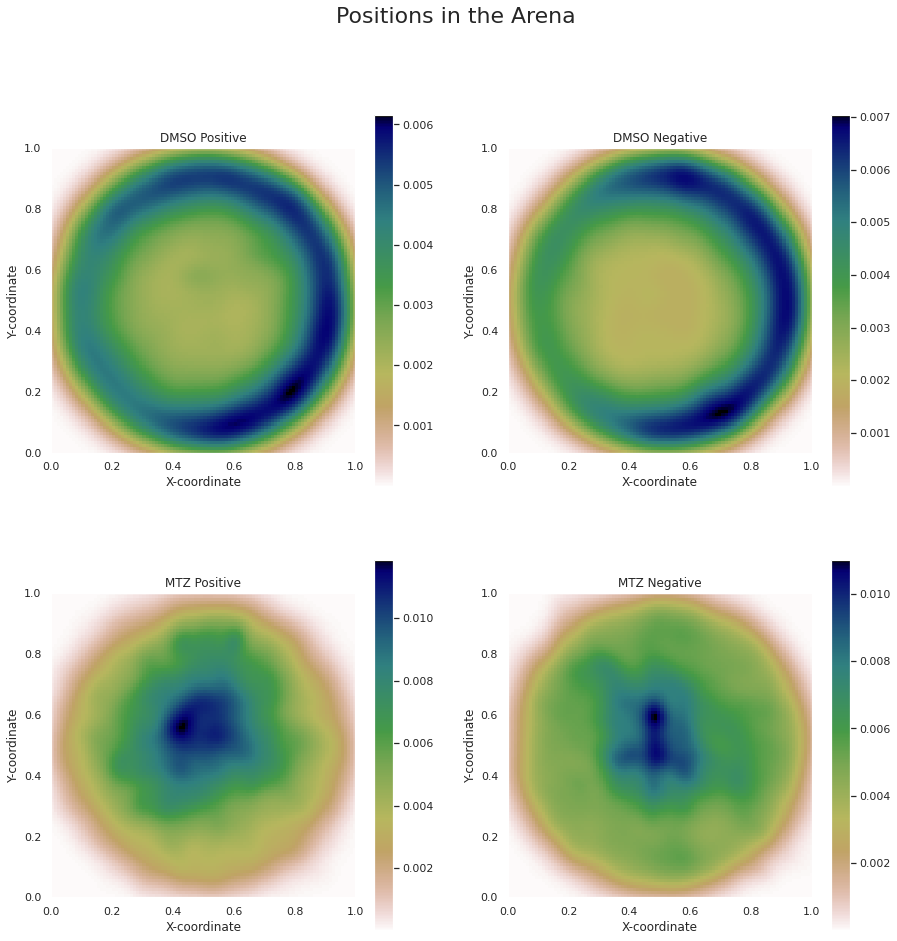

In [9]:
fig, axs = plt.subplots(2,2, figsize=(15,15))

groups=[z_dp,z_dn,z_mp, z_mn]
titles=['DMSO Positive','DMSO Negative','MTZ Positive','MTZ Negative']
     
xmin = 0
xmax = 1
ymin = 0
ymax = 1

    
for ax, group, title in zip(axs.flat, groups, titles):
    im = ax.imshow(np.rot90(group), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
    ax.set_xlim([xmin, xmax])
    ax.set_xlabel('X-coordinate')
    ax.set_ylim([ymin, ymax])
    ax.set_ylabel('Y-coordinate')
    ax.set_title(title)
    ax.grid(False)

    fig.colorbar(im, ax=ax)
    
fig.suptitle('Positions in the Arena', fontsize=22)

    
plt.show()   

### Speed and Acceleration

#### Speed

In [10]:
def speed(trajectories):
    
    ''' This function consideres each fish independently and calculates the median speed of each fish per video.
    The output is 1D an array with (number_of_individuals * number_of_videos) elements.'''
    
    condition_speed = []
    video_speed = []
    
    for tr in trajectories:
        med_speed = np.nanmedian(tr.speed, axis=0) 
        video_speed = np.hstack((video_speed, med_speed))  # Now, I stack the data from every individual of each video of a given condition
        
    return np.hstack((condition_speed, video_speed))

In [11]:
# Example: condition = dp; number_of_videos = 33; number_of_individuals = 5;

print(speed(dp).shape)

(180,)


##### Checking average speed and the distributions 

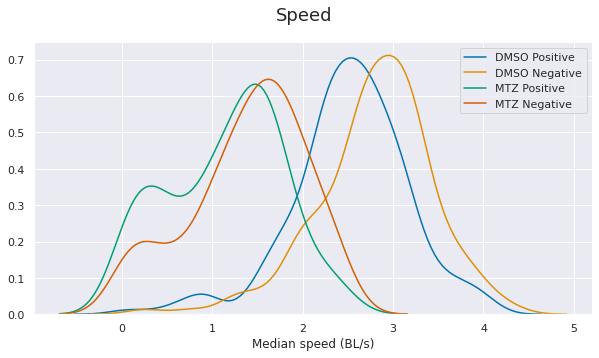

In [12]:
groups = [dp, dn, mp, mn]
titles = ['DMSO Positive', 'DMSO Negative', 'MTZ Positive', 'MTZ Negative']

def group_speed_kde(group, title):

    group_speed = []

    condition_speed = speed(group)
        
    percentile = np.nanpercentile(condition_speed ,95)
        
    for value in condition_speed:
        if value < percentile:
            group_speed.append(value)
    
    sns.kdeplot(group_speed, label = title)
    
    plt.xlabel('Median speed (BL/s)', fontsize=12)

fig=plt.figure(figsize=(10,5))

for group, title in zip(groups, titles):
    
    group_speed_kde(group, title)

fig.suptitle('Speed', fontsize = 18) 
sns.despine()
sns.set_style("white")

##### Rainplot

In [13]:
speed_dp = speed(dp)
speed_dn = speed(dn)
speed_mp = speed(mp)
speed_mn = speed(mn)

In [14]:
condition = np.concatenate([['DMSO']*speed_dp.shape[0],['DMSO']*speed_dn.shape[0],['MTZ']*speed_mp.shape[0],['MTZ']*speed_mn.shape[0]])
strain = np.concatenate([['Positive']*speed_dp.shape[0], ['Negative']*speed_dn.shape[0],['Positive']*speed_mp.shape[0],['Negative']*speed_mn.shape[0]])

In [15]:
y_data = np.concatenate((speed_dp, speed_dn, speed_mp, speed_mn))

speed_dict = {'condition':condition,
    'Strain':strain,
    'data':y_data}

df_speed = pd.DataFrame(data=speed_dict)

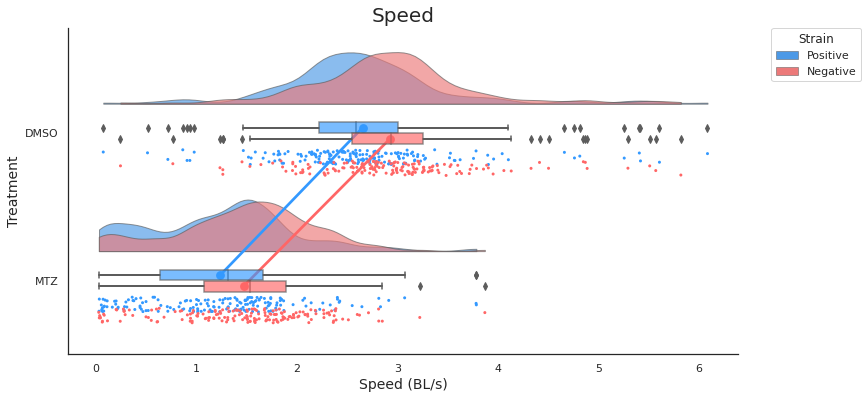

In [16]:
ort="h"; pal = ['#3399ff','#ff6666']; sigma = .2

f, ax = plt.subplots(figsize=(12, 6))

ax = pt.RainCloud(x = 'condition', y = 'data', data = df_speed, hue='Strain',palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)



plt.xlabel('Speed (BL/s)', fontsize=14)
plt.ylabel('Treatment', fontsize=14)
plt.title("Speed", fontsize =20)
sns.despine()
sns.set_style("white")

#### Acceleration

In [17]:
def acceleration(trajectories):
    
    ''' This function consideres each fish independently and calculates the median acceleration of each fish per video.
    The output is 1D an array with (number_of_individuals * number_of_videos) elements.'''
    
    condition_acc = []
    video_acc = []
    
    for tr in trajectories:
        med_acc = np.nanmedian(tr.acceleration, axis=0) 
        video_acc = np.hstack((video_acc, med_acc))  # Now, I stack the data from every individual of each video of a given condition
        
    return np.hstack((condition_acc, video_acc))

In [18]:
# Example: condition = dp; number_of_videos = 33; number_of_individuals = 5;

print(acceleration(dp).shape)

(180,)


##### Checking average speed and the distributions 

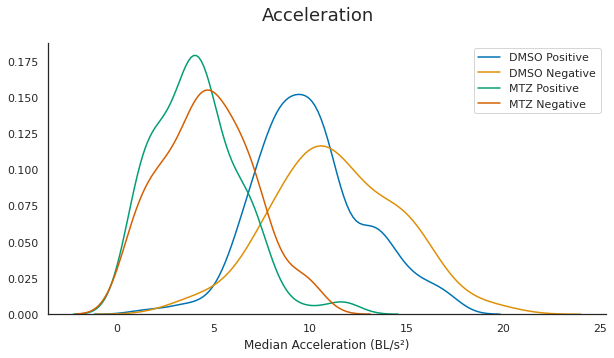

In [19]:
groups = [dp, dn, mp, mn]
titles = ['DMSO Positive', 'DMSO Negative', 'MTZ Positive', 'MTZ Negative']

def group_acc_kde(group, title):

    group_acc = []

    condition_acc = acceleration(group)
        
    percentile = np.nanpercentile(condition_acc ,95)
        
    for value in condition_acc:
        if value < percentile:
            group_acc.append(value)
            
    sns.kdeplot(group_acc, label = title)
    
    plt.xlabel('Median Acceleration (BL/s²)', fontsize=12)

fig=plt.figure(figsize=(10,5))

for group, title in zip(groups, titles):
    
    group_acc_kde(group, title)

fig.suptitle('Acceleration', fontsize = 18) 
sns.despine()

##### Raincloud

In [20]:
acc_dp = acceleration(dp)
acc_dn = acceleration(dn)
acc_mp = acceleration(mp)
acc_mn = acceleration(mn)

y_data = np.concatenate((acc_dp, acc_dn, acc_mp, acc_mn))

acc_dict = {'condition':condition,
    'Strain':strain,
    'data':y_data}

df_acc = pd.DataFrame(data=acc_dict)

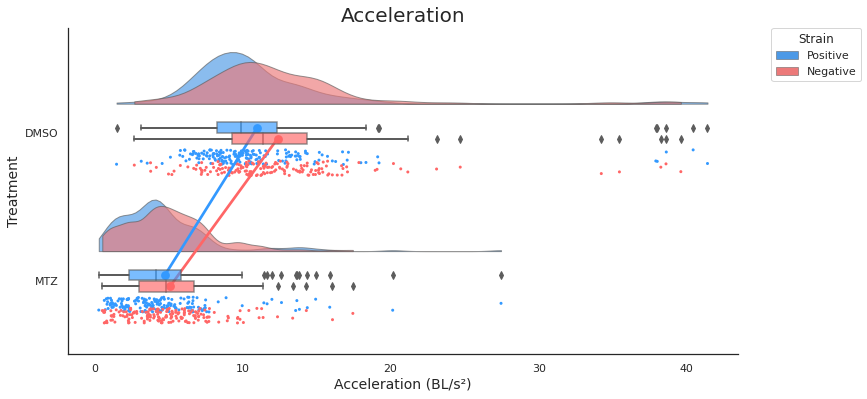

In [21]:
ort="h"; pal = ['#3399ff','#ff6666']; sigma = .2

f, ax = plt.subplots(figsize=(12, 6))

ax = pt.RainCloud(x = 'condition', y = 'data', data = df_acc, hue='Strain',palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)



plt.xlabel('Acceleration (BL/s²)', fontsize=14)
plt.ylabel('Treatment', fontsize=14)
plt.title("Acceleration", fontsize =20)
sns.despine()
sns.set_style("white")

#### Statistics

##### Normality check: Shapiro-Wilks and Levene test

KDE plots are a non-parametric method to visualise the estimates of a distribution. Our data does not seem normal, but lets do the Shapiro-Wilks test to be sure.

In [22]:
# Preparation of data

speed_dp = speed(dp)
speed_dn = speed(dn)
speed_mp = speed(mp)
speed_mn = speed(mn)

acc_dp = acceleration(dp)
acc_dn = acceleration(dn)
acc_mp = acceleration(mp)
acc_mn = acceleration(mn)

In [23]:
group_s = [speed_dp, speed_dn, speed_mp, speed_mn]
group_a = [acc_dp, acc_dn, acc_mp, acc_mn]
titles = ['DMSO Positive', 'DMSO Negative', 'MTZ Positive', 'MTZ Negative']

for s, a, title in zip(group_s, group_a, titles):    
    
    print(title)
    print('Speed:', stats.shapiro(s))
    print('Acceleration:', stats.shapiro(a))

DMSO Positive
Speed: (0.9163752794265747, 1.3000053478151585e-08)
Acceleration: (0.654869556427002, 6.22127967073902e-19)
DMSO Negative
Speed: (0.946705162525177, 6.9973730205674656e-06)
Acceleration: (0.7714722752571106, 9.24118705278483e-15)
MTZ Positive
Speed: (0.9612597227096558, 9.044942999025807e-05)
Acceleration: (0.7802181243896484, 6.245401348452294e-15)
MTZ Negative
Speed: (0.9781841039657593, 0.007507479749619961)
Acceleration: (0.9355810284614563, 4.637887229819171e-07)


In [24]:
stats.levene(speed_dp, speed_dn, speed_mp, speed_mn)

LeveneResult(statistic=0.1812730646341006, pvalue=0.9091241192518037)

Note: From these results, the data could be considered normal but since other features are not, I'm running the same non-parametric tests for each feature. 

##### One-way ANOVA and Tukey HSD

In [25]:
## Speed
stats.f_oneway(speed_dp, speed_dn, speed_mp, speed_mn)


data=np.concatenate((speed_dp, speed_dn, speed_mp, speed_mn))
group=np.concatenate((np.asarray((['dp']*180,['dn']*165,['mp']*175,['mn']*175))))

print(pairwise_tukeyhsd(data, group))

## Acceleration
stats.f_oneway(acc_dp, acc_dn, acc_mp, acc_mn)

data=np.concatenate((acc_dp, acc_dn, acc_mp, acc_mn))
group=np.concatenate((np.asarray((['dp']*180,['dn']*165,['mp']*175,['mn']*175))))
print(pairwise_tukeyhsd(data, group))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    dn     dp  -0.2727  0.007 -0.4901 -0.0554   True
    dn     mn  -1.4555  0.001 -1.6743 -1.2367   True
    dn     mp  -1.6881  0.001 -1.9069 -1.4693   True
    dp     mn  -1.1828  0.001 -1.3968 -0.9687   True
    dp     mp  -1.4154  0.001 -1.6295 -1.2013   True
    mn     mp  -0.2326 0.0286 -0.4482  -0.017   True
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    dn     dp  -1.3772 0.0314 -2.6692 -0.0853   True
    dn     mn  -7.2453  0.001 -8.5461 -5.9446   True
    dn     mp   -7.604  0.001 -8.9047 -6.3033   True
    dp     mn  -5.8681  0.001 -7.1406 -4.5956   True
    dp     mp  -6.2268  0.001 -7.4993 -4.9543   True
    mn     mp  -0.3587 0.8806 -1.6401  0.9228 

Summary stats:
- Data considered normal through Shapiro Wilks and Levene tests;

- Speed: cannot reject H0 between mn and mp, but we reject for every other pairwise comparison. There seems to be no difference between the two groups treated with MTZ but there are between tretments and between both groups treated with dmso (weird);

- Acceleration: cannot reject H0 between mn and mp and dp an dn. Now this makes more sence since there should be no differences between strains. The differences are between treatments dmso and mtz.

## Focal Analysis 

### Heat Maps for Positions, Turn and Accelerations

In [26]:
## Rotated Trajectories

num_bins_r = 6     # Number of bin edges in radial direction
num_bins_theta = 12 # Number of bin edges in angular direction 
    
# Create polar edges
r_edges = np.linspace(0, 5, num_bins_r + 1) 
theta_edges = np.linspace(-np.pi, np.pi, num_bins_theta + 1)
    
        
# Calculate binsize for normalization (binsize increases with radius)
dr = np.pi*(r_edges[1:]**2 - r_edges[0:-1]**2)
dtheta = (theta_edges[1] - theta_edges[0])/(2*np.pi)
area = np.repeat(dtheta*dr[:,np.newaxis],theta_edges.shape[0]-1,1)

def rotated_trajectories(trajectories): 

    pos_value = []
    turn_value = []
    fwd_value = []
    
    for tr in trajectories:
        
        s_rotated = np.empty((tr.number_of_frames, tr.number_of_individuals, tr.number_of_individuals, 2))
        a_rotated = tt.fixed_to_comoving(tr.a,tr.e)

        for focal in range(tr.number_of_individuals):
            s = ttgeometry.center_in_individual(tr.s,focal)
            sr = ttgeometry.fixed_to_comoving(s,tr.e[:,focal,:]) 
            sr[:,focal] = np.nan # Change rotated positions of the focal itself from '0' to 'NaN'. 
            ar = ttgeometry.fixed_to_comoving(tr.a[:,focal],tr.e[:,focal])
            
            # Reshape to add all the fish together
         
            sr_flat = sr.reshape((-1,1,2))
            ar_flat = np.repeat(ar[:,np.newaxis,:],tr.number_of_individuals,1).reshape((-1,1,2))
            
            

            # Transform cartesian to polar coordinates
            r = np.sqrt(sr_flat[:,0,0]**2 + sr_flat[:,0,1]**2)
            theta = np.arctan2(sr_flat[:,0,0], sr_flat[:,0,1])
        
        
            # Select the array for binned statistics/mapping 
            map_value = ar_flat[:,0,:]
        
            # Calculate the 2d histogram and binned statistics for focal turning and acceleration
            Position = stats.binned_statistic_2d(r, theta, None, 'count', bins=np.asarray([r_edges,theta_edges]))
            Turn = stats.binned_statistic_2d(r, theta, map_value[:,0], np.nanmean, bins=np.asarray([r_edges,theta_edges]))
            Fwd = stats.binned_statistic_2d(r, theta, map_value[:,1], np.nanmean, bins=np.asarray([r_edges,theta_edges]))
        
    
            pos_value.append(Position.statistic/area/np.sum(Position.statistic))
            turn_value.append(Turn.statistic)
            fwd_value.append(Fwd.statistic)
        
    
    return np.asarray(pos_value), np.asarray(turn_value), np.asarray(fwd_value)
   
   

In [27]:
pos_dp, turn_dp, fwd_dp = rotated_trajectories(dp)
pos_dn, turn_dn, fwd_dn = rotated_trajectories(dn)
pos_mp, turn_mp, fwd_mp = rotated_trajectories(mp)
pos_mn, turn_mn, fwd_mn = rotated_trajectories(mn)

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/traject

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/traject

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide



In [28]:
print(pos_dp.shape, turn_dp.shape, fwd_dp.shape)
print(pos_dn.shape, turn_dn.shape, fwd_dn.shape)
print(pos_mp.shape, turn_mp.shape, fwd_mp.shape)
print(pos_mn.shape, turn_mn.shape, fwd_mn.shape)

(180, 6, 12) (180, 6, 12) (180, 6, 12)
(165, 6, 12) (165, 6, 12) (165, 6, 12)
(175, 6, 12) (175, 6, 12) (175, 6, 12)
(175, 6, 12) (175, 6, 12) (175, 6, 12)


In [29]:
# Getting the data to plot

def polar_plot(pos, turn, fwd):
    
    position = np.nanmedian(pos, axis = 0)
    turns = np.nanmedian(turn, axis = 0)
    fwd_acc = np.nanmedian(fwd, axis = 0)
    
    
    
    return position, turns, fwd_acc


dp_hist = polar_plot(pos_dp, turn_dp, fwd_dp)
dn_hist = polar_plot(pos_dn, turn_dn, fwd_dn)
mp_hist = polar_plot(pos_mp, turn_mp, fwd_mp)
mn_hist = polar_plot(pos_mn, turn_mn, fwd_mn)

In [30]:
def interpolate_polarmap_angles(histogram, theta_edges, r_edges, factor = 1):
    histogram_interpolated = np.zeros((histogram.shape[0], histogram.shape[1]*factor))
    for k in range(factor):
        histogram_interpolated[:,k::factor] = histogram
    theta_edges = np.linspace(-np.pi, np.pi, (theta_edges.shape[0]-1)*factor + 1)
    Theta, R = np.meshgrid(theta_edges, r_edges)
    return histogram_interpolated, Theta, R

def plot_polar_histogram(values, label, ax, cmap=None, sym=False):
    
    Theta, R = np.meshgrid(theta_edges, r_edges)
    mp, Theta, R = interpolate_polarmap_angles(values, theta_edges, r_edges, factor = 5)
    
    #Theta_acc, R_acc = np.meshgrid(theta_edges, r_edges_acc)
    #mp_acc, Theta_acc, R_acc = interpolate_polarmap_angles(values, theta_edges, r_edges_acc, factor = 5)

    # Select color limits: 
    if sym:
        vmax = np.max(np.abs(values))
        vmin = -vmax
    else:
        vmax = np.max(values)
        vmin = 0
     
    # Plot histogram/map
    if label == 'Position':
        im = ax.pcolormesh(Theta, R, mp, cmap=cmap, vmin=0, vmax=0.03)
    elif label == 'Turn':
        im = ax.pcolormesh(Theta, R, mp, cmap=cmap, vmin=-3, vmax=3)
    elif label == 'Acceleration':
        im = ax.pcolormesh(Theta, R, mp, cmap=cmap, vmin=-2, vmax=2)
    cb = plt.colorbar(im, ax=ax, cmap=cmap)
    cb.ax.tick_params(labelsize=24)
    ax.set_title(label,fontsize=36)
    
    # Adjusting axis and sense of rotation to make it compatible with [2]:
    # Direction of movement along vertical axis, angles increase in clockwise
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)


In [31]:
def final_plt(values, title):
    
    figure(num=None, figsize=(40, 10), facecolor='w', edgecolor='k')
    
    
    plot_polar_histogram(values[0], 'Position', plt.subplot(131, polar=True), cmap=plt.get_cmap('winter'))
    plot_polar_histogram(values[1], 'Turn', plt.subplot(132, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)
    plot_polar_histogram(values[2], 'Acceleration', plt.subplot(133, polar=True), cmap=plt.get_cmap('coolwarm'), sym = True)
    
    plt.suptitle(title, fontsize=40)
    
    
    plt.subplots_adjust(top=0.8)
    

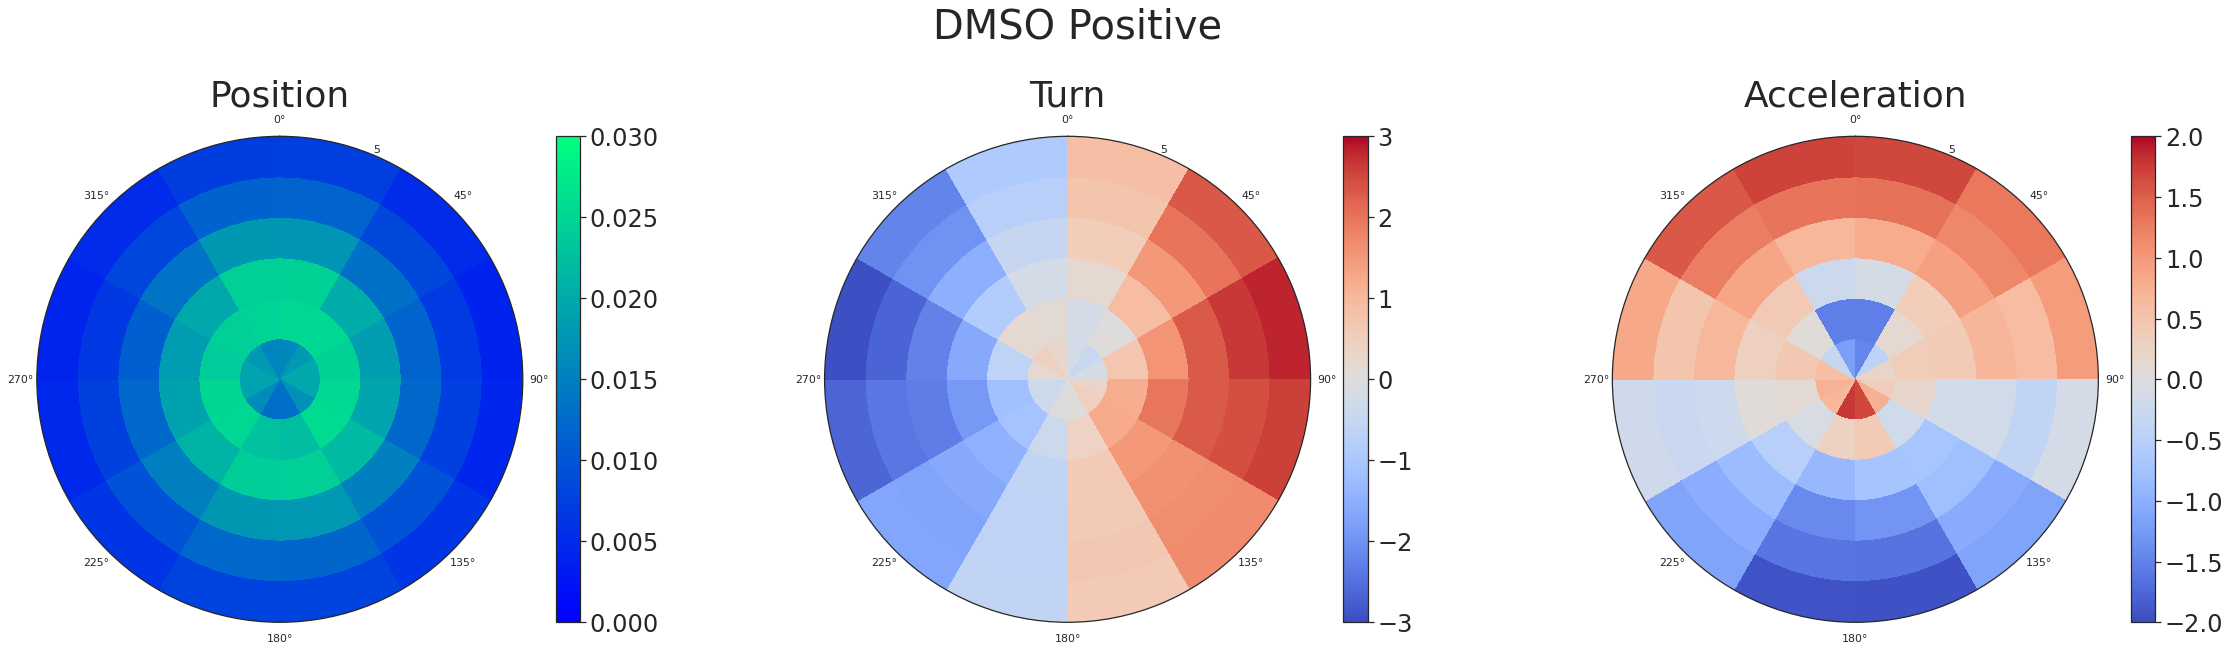

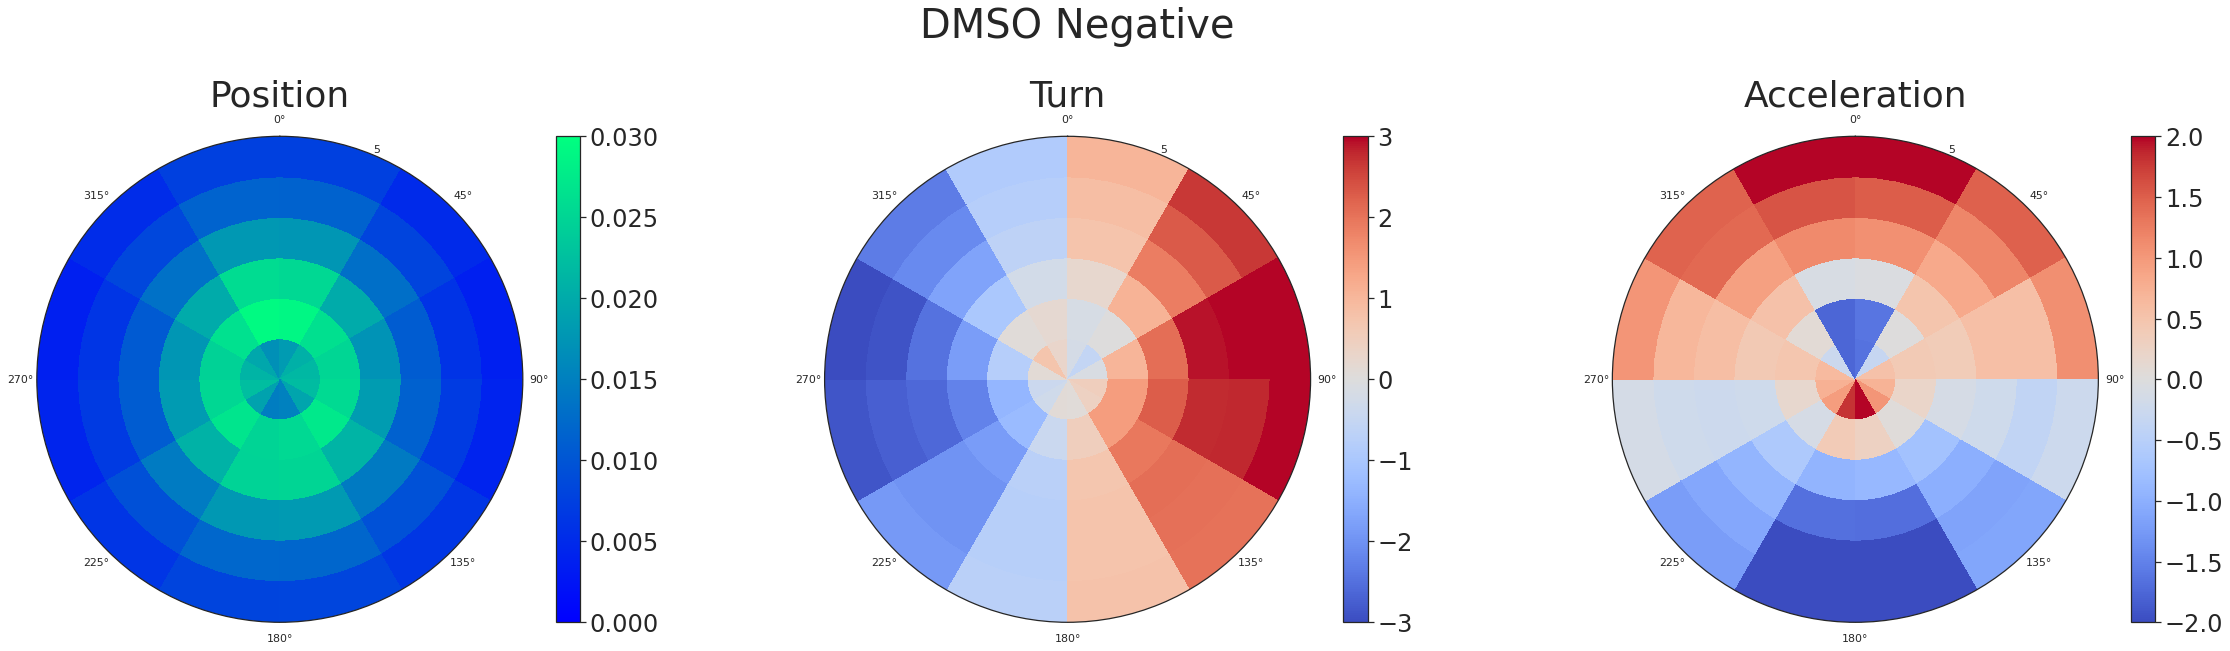

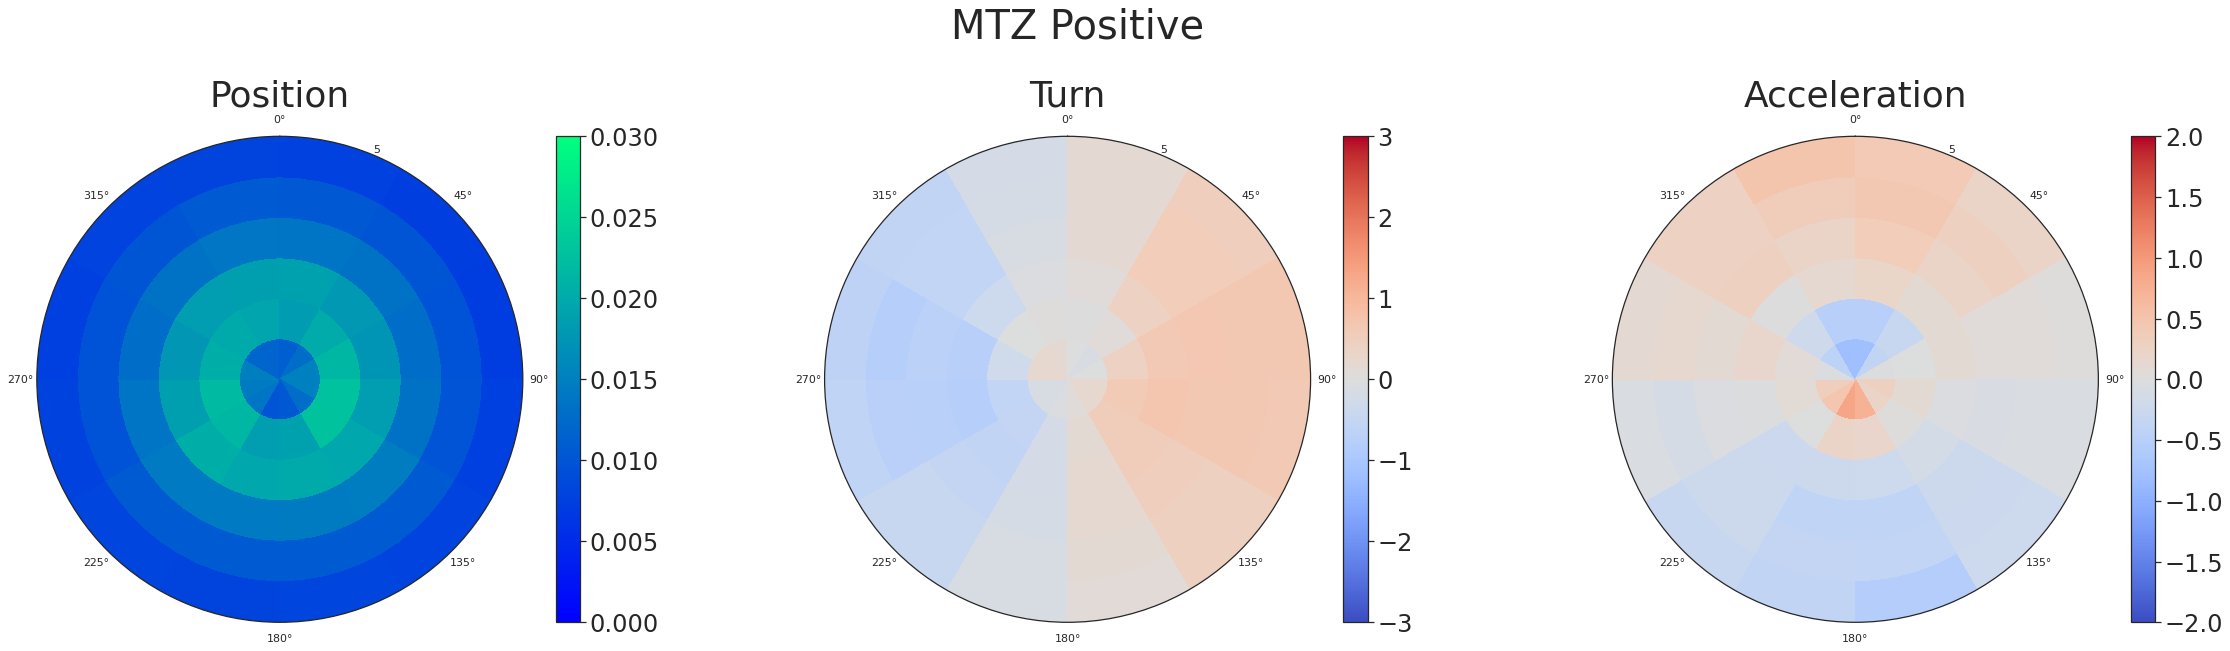

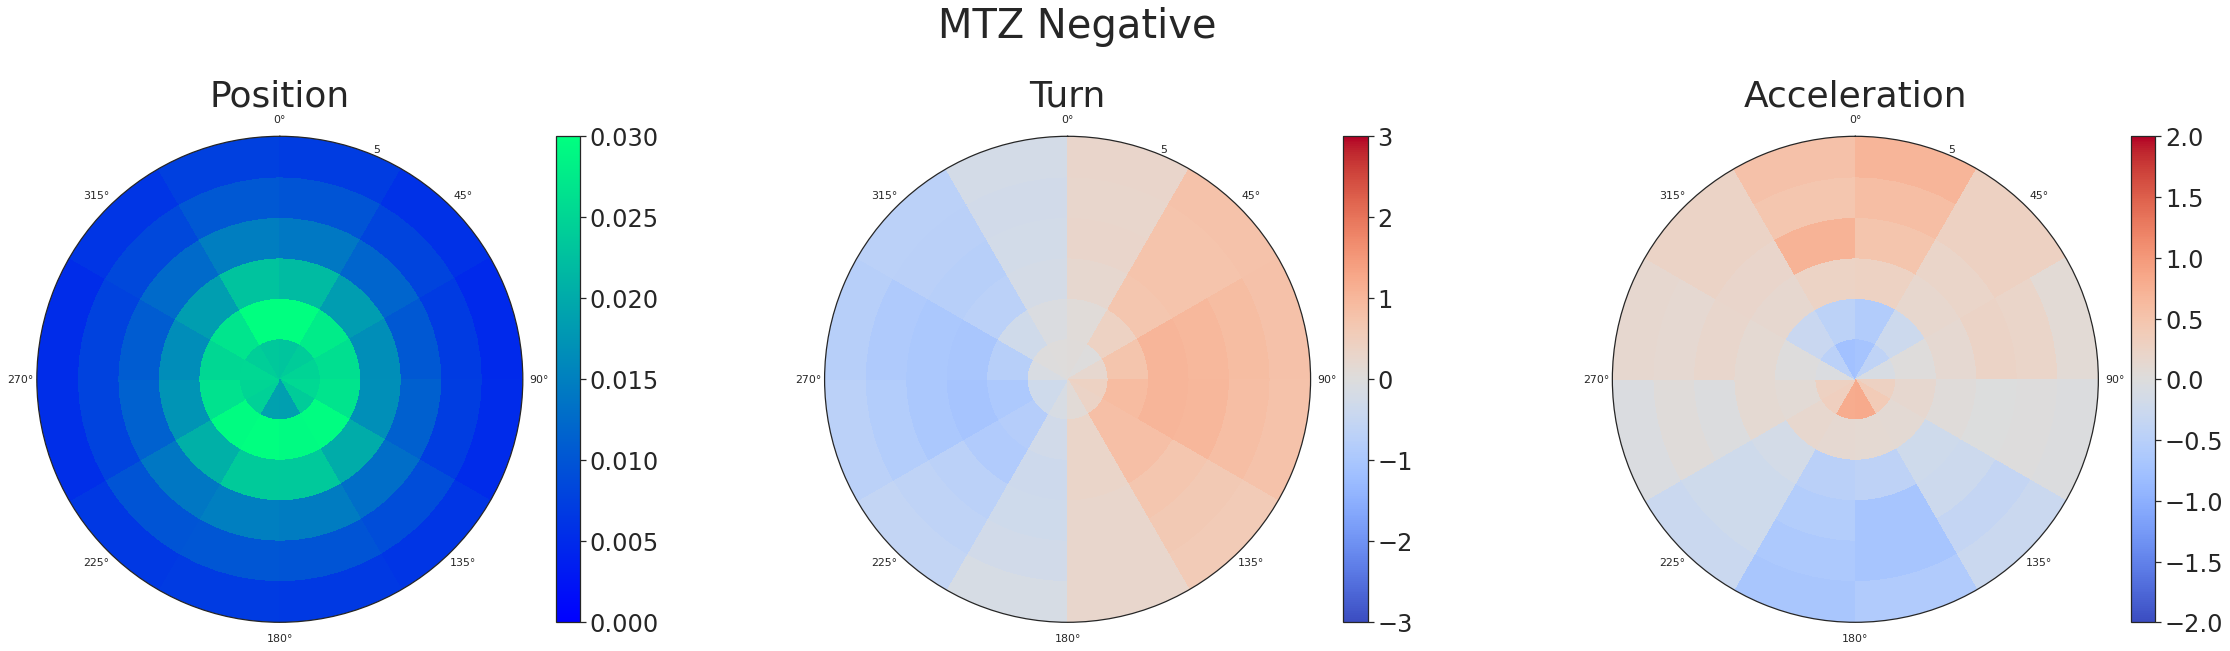

In [32]:
final_plt(dp_hist, 'DMSO Positive')
final_plt(dn_hist, 'DMSO Negative')
final_plt(mp_hist, 'MTZ Positive')
final_plt(mn_hist, 'MTZ Negative')

##### Subtraction Heatmaps

These heatmaps represent de difference between 4 pairs of the heatmaps shown above. The pairs are written in the title of each plot.
Also, the code need to be cleaned.

In [33]:
def sub_plot_polar(values, feature, label, ax, cmap=None, sym=False):
    
    Theta, R = np.meshgrid(theta_edges, r_edges)
    mp, Theta, R = interpolate_polarmap_angles(values, theta_edges, r_edges, factor = 5)

    # Plot histogram/map
    if feature == 'position':
        im = ax.pcolormesh(Theta, R, mp, cmap=cmap, vmin=-0.01, vmax=0.01)
    elif feature == 'turn':
        im = ax.pcolormesh(Theta, R, mp, cmap=cmap, vmin=-1.7, vmax=1.7)
    elif feature == 'acc':
        im = ax.pcolormesh(Theta, R, mp, cmap=cmap, vmin=-0.015, vmax=0.015)

    cb = plt.colorbar(im, ax=ax, cmap=cmap,pad=0.17)
    cb.ax.tick_params(labelsize=10)
    ax.set_title(label,fontsize=13, y=1.3)
    
    # Adjusting axis and sense of rotation to make it compatible with [2]:
    # Direction of movement along vertical axis, angles increase in clockwise
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    


In [34]:
# Subtraction values: Position

pos_dp_dn = np.subtract(dp_hist[0],dn_hist[0]) 
pos_dp_mp = np.subtract(dp_hist[0],mp_hist[0]) 
pos_dn_mn = np.subtract(dn_hist[0],mn_hist[0]) 
pos_mn_mp = np.subtract(mn_hist[0],mp_hist[0]) 

# Subtraction values: Turn

turn_dp_dn = np.subtract(dp_hist[1],dn_hist[1]) 
turn_dp_mp = np.subtract(dp_hist[1],mp_hist[1]) 
turn_dn_mn = np.subtract(dn_hist[1],mn_hist[1]) 
turn_mn_mp = np.subtract(mn_hist[1],mp_hist[1]) 


# Subtraction values: Acceleration

acc_dp_dn = np.subtract(dp_hist[2],dn_hist[2]) 
acc_dp_mp = np.subtract(dp_hist[2],mp_hist[2]) 
acc_dn_mn = np.subtract(dn_hist[2],mn_hist[2]) 
acc_mn_mp = np.subtract(mn_hist[2],mp_hist[2]) 


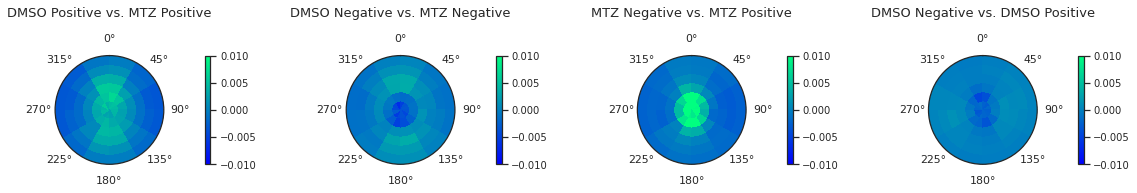

In [35]:
figure(num=None, figsize=(20, 2), facecolor='w', edgecolor='k')
    
sub_plot_polar(pos_dp_mp,'position','DMSO Positive vs. MTZ Positive', plt.subplot(141, polar=True), cmap=plt.get_cmap('winter'))
sub_plot_polar(pos_dn_mn,'position','DMSO Negative vs. MTZ Negative', plt.subplot(142, polar=True), cmap=plt.get_cmap('winter'))
sub_plot_polar(pos_mn_mp,'position','MTZ Negative vs. MTZ Positive', plt.subplot(143, polar=True), cmap=plt.get_cmap('winter'))
sub_plot_polar(pos_dp_dn,'position','DMSO Negative vs. DMSO Positive', plt.subplot(144, polar=True), cmap=plt.get_cmap('winter'))


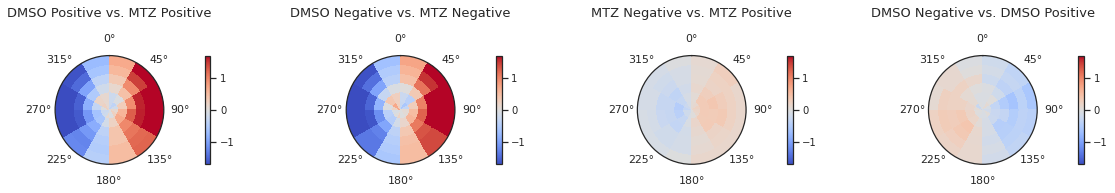

In [36]:
figure(num=None, figsize=(20, 2), facecolor='w', edgecolor='k')

sub_plot_polar(turn_dp_mp,'turn', 'DMSO Positive vs. MTZ Positive', plt.subplot(141, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)
sub_plot_polar(turn_dn_mn,'turn', 'DMSO Negative vs. MTZ Negative', plt.subplot(142, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)
sub_plot_polar(turn_mn_mp,'turn', 'MTZ Negative vs. MTZ Positive', plt.subplot(143, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)
sub_plot_polar(turn_dp_dn,'turn', 'DMSO Negative vs. DMSO Positive', plt.subplot(144, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)


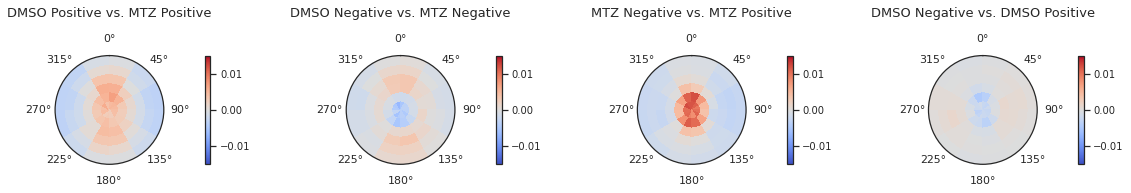

In [37]:
figure(num=None, figsize=(20, 2), facecolor='w', edgecolor='k')
    
sub_plot_polar(pos_dp_mp,'acc','DMSO Positive vs. MTZ Positive', plt.subplot(141, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)
sub_plot_polar(pos_dn_mn,'acc','DMSO Negative vs. MTZ Negative', plt.subplot(142, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)
sub_plot_polar(pos_mn_mp,'acc','MTZ Negative vs. MTZ Positive', plt.subplot(143, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)
sub_plot_polar(pos_dp_dn,'acc','DMSO Negative vs. DMSO Positive', plt.subplot(144, polar=True), cmap=plt.get_cmap('coolwarm'),sym=True)


#### Statistics

###### Kruskal Wallis and Conover post-hoc test

In [38]:
def kwh(group1, group2, group3, group4, num_bins_r, num_bins_theta):
    '''Kruskal Wallis H test. This function returns a matrix of p-values. Should be one per bin.'''
    
    p_matrix = np.zeros((6,12))

    for i in range(num_bins_r):
        for j in range(num_bins_theta):
            stat, p = stats.kruskal(group1[:,i,j],group2[:,i,j],group3[:,i,j],group4[:,i,j])
            p_matrix[i,j] = p
    
    return p_matrix

p_values = kwh(pos_dp, pos_dn, pos_mp, pos_mn, num_bins_r, num_bins_theta)

In [39]:
# Get the p-values

def conover_test(label):
    
    # Matrix with p-values for each group
    
    dp_mp = np.zeros((6,12))
    dn_mn = np.zeros((6,12))
    mn_mp = np.zeros((6,12))
    dn_dp = np.zeros((6,12))

    for i in range(len(r_edges[:-1])):
        for j in range(len(theta_edges[:-1])):
            
            if label == 'position':
                conover = sp.posthoc_conover([pos_dp[:,i,j],pos_dn[:,i,j],pos_mp[:,i,j],pos_mn[:,i,j]])
            elif label == 'turn':
                conover = sp.posthoc_conover([turn_dp[:,i,j],turn_dn[:,i,j],turn_mp[:,i,j],turn_mn[:,i,j]])
            elif label == 'fwd':
                conover = sp.posthoc_conover([fwd_dp[:,i,j],fwd_dn[:,i,j],fwd_mp[:,i,j],fwd_mn[:,i,j]])

            conover.rename(columns={1:'dp', 2:'dn', 3:'mp', 4:'mn'}, 
                    index={1:'dp',2:'dn',3:'mp', 4:'mn'}, inplace=True)
            
            dp_mp[i,j] = conover.loc['dp','mp']
            dn_mn[i,j] = conover.loc['dn','mn']
            mn_mp[i,j] = conover.loc['mn','mp']
            dn_dp[i,j] = conover.loc['dn','dp']


    return dp_mp, dn_mn, mn_mp, dn_dp


In [40]:
pos_pvalues = conover_test('position')
turn_pvalues = conover_test('turn')
acc_pvalues = conover_test('fwd')

In [41]:
def sub_plot_polar(values, label, ax, cmap=None, sym=False):
    
    Theta, R = np.meshgrid(theta_edges, r_edges)
    mp, Theta, R = interpolate_polarmap_angles(values, theta_edges, r_edges, factor = 5)

    
    colors = ['#ff5050','#ff8080','#ffb3b3','#ffffff']
    names = ['***', '**', '*', 'n.s.']
    
    cmap, norm = mcolors.from_levels_and_colors([0, 0.001, 0.01, 0.05, 1], colors)

    im = ax.pcolormesh(Theta, R, mp, cmap=cmap, norm=norm)
    
    cb = plt.colorbar(im, ax=ax, cmap=cmap,pad=0.17)


    cb.ax.get_yaxis().set_ticks([])
    for j, lab in enumerate(names):
        cb.ax.text(2, (2 * j + 1) / 8.0, lab, ha='left', va='center')
    
    #cb.ax.tick_params(labelsize=10)
    #ax.set_title(label,fontsize=13, y=1.3)

     
    ax.set_title(label,fontsize=13, y=1.3)
    
    # Adjusting axis and sense of rotation to make it compatible with [2]:
    # Direction of movement along vertical axis, angles increase in clockwise
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)


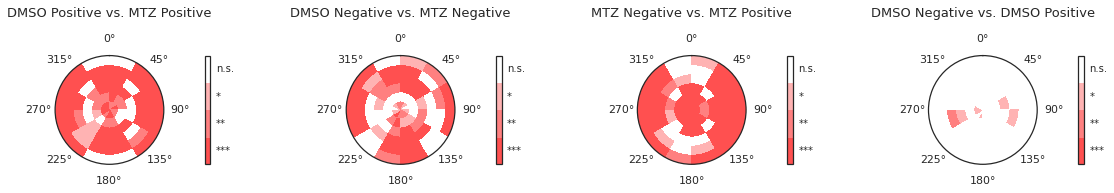

In [42]:
figure(num=None, figsize=(20, 2), facecolor='w', edgecolor='k')
    
sub_plot_polar(pos_pvalues[0],'DMSO Positive vs. MTZ Positive', plt.subplot(141, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(pos_pvalues[1],'DMSO Negative vs. MTZ Negative', plt.subplot(142, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(pos_pvalues[2],'MTZ Negative vs. MTZ Positive', plt.subplot(143, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(pos_pvalues[3],'DMSO Negative vs. DMSO Positive', plt.subplot(144, polar=True), cmap=plt.get_cmap('Pastel1'))


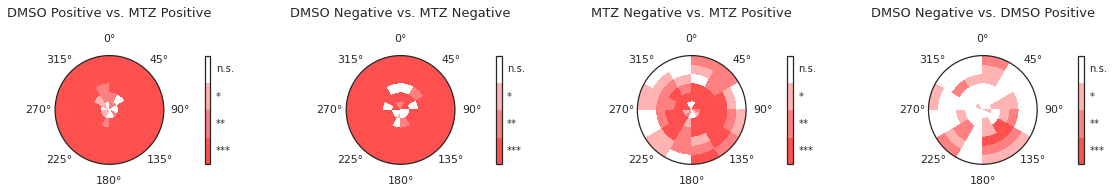

In [43]:
figure(num=None, figsize=(20, 2), facecolor='w', edgecolor='k')
    
sub_plot_polar(turn_pvalues[0],'DMSO Positive vs. MTZ Positive', plt.subplot(141, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(turn_pvalues[1],'DMSO Negative vs. MTZ Negative', plt.subplot(142, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(turn_pvalues[2],'MTZ Negative vs. MTZ Positive', plt.subplot(143, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(turn_pvalues[3],'DMSO Negative vs. DMSO Positive', plt.subplot(144, polar=True), cmap=plt.get_cmap('Pastel1'))

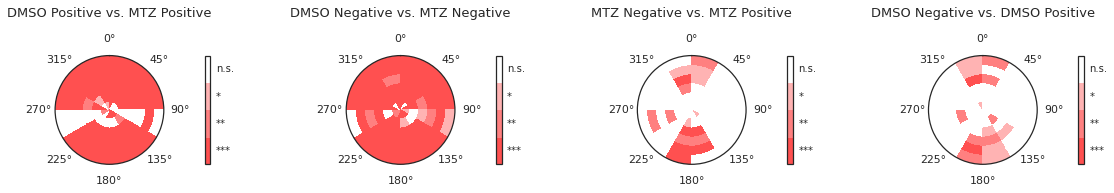

In [44]:
figure(num=None, figsize=(20, 2), facecolor='w', edgecolor='k')
    
sub_plot_polar(acc_pvalues[0],'DMSO Positive vs. MTZ Positive', plt.subplot(141, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(acc_pvalues[1],'DMSO Negative vs. MTZ Negative', plt.subplot(142, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(acc_pvalues[2],'MTZ Negative vs. MTZ Positive', plt.subplot(143, polar=True), cmap=plt.get_cmap('Pastel1'))
sub_plot_polar(acc_pvalues[3],'DMSO Negative vs. DMSO Positive', plt.subplot(144, polar=True), cmap=plt.get_cmap('Pastel1'))

### Interindividual Distances

#### Overall IID

In [45]:
def interindividual_distance(trajectories):
    amatrix = ttsocial.adjacency_matrix(trajectories, mode='distance')
    for i in range(amatrix.shape[1]):
        amatrix[:,i,i] = np.nan
    return amatrix

In [46]:
def group_iid(group):
    ''' Calculates the inter-individual distances for each condition.'''
    
    dist = []
    
    for tr in group:
        
        distances = interindividual_distance(tr.s[:35000]).reshape((-1,tr.number_of_individuals)) # I wanted to have the same number of frames everywhere. 
        dist.append(distances)


    return dist

In [47]:
idd_dp = group_iid(dp)
idd_dn = group_iid(dn)
idd_mp = group_iid(mp)
idd_mn = group_iid(mn)

In [48]:
print(np.shape(idd_dp))
print(np.shape(idd_dn))
print(np.shape(idd_mp))
print(np.shape(idd_mn))

(36, 175000, 5)
(33, 175000, 5)
(35, 175000, 5)
(35, 175000, 5)


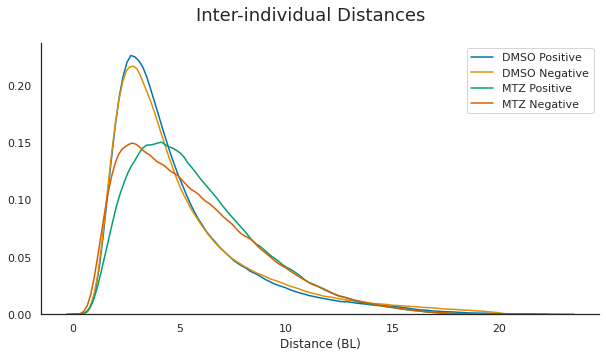

In [49]:
def distances(group):

    distance=[]
    
    for video in group:
    
        dist = np.nanmedian(video, axis=1) # Here I'm plotting the data from all the videos
        distance.append(dist)
    
    return distance

fig=plt.figure(figsize=(10,5))

plt.xlabel('Distance (BL)', fontsize=12)

sns.kdeplot(np.reshape(distances(idd_dp), -1), label='DMSO Positive')
sns.kdeplot(np.reshape(distances(idd_dn), -1), label='DMSO Negative')
sns.kdeplot(np.reshape(distances(idd_mp), -1), label='MTZ Positive')
sns.kdeplot(np.reshape(distances(idd_mn), -1), label='MTZ Negative')

plt.suptitle('Inter-individual Distances', fontsize = 18) 
sns.despine()
sns.set_style("white")

#### Analysis over time: Split IID

In [50]:
def time_blocks(group):
    '''This function devides the data of each video in blocks of 5 minutes.'''
    
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    
    for video in group:
        
        time1 = video[:9000]
        time2 = video[9000:18000]
        time3 = video[18000:27000]
        time4 = video[27000:35000]
    
        t1.append(time1)
        t2.append(time2)
        t3.append(time3)
        t4.append(time4)
    
    return np.asarray(t1), np.asarray(t2), np.asarray(t3), np.asarray(t4)

t1_dp, t2_dp, t3_dp, t4_dp = time_blocks(idd_dp)
t1_dn, t2_dn, t3_dn, t4_dn = time_blocks(idd_dn)
t1_mp, t2_mp, t3_mp, t4_mp = time_blocks(idd_mp)
t1_mn, t2_mn, t3_mn, t4_mn = time_blocks(idd_mn)

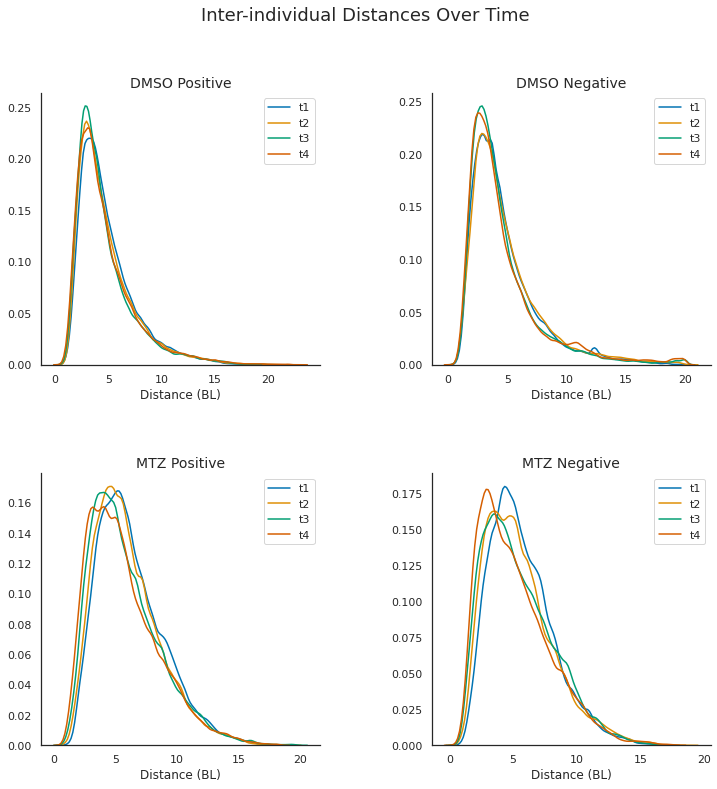

In [51]:
fig = plt.figure(figsize=(12,12))

fig.suptitle('Inter-individual Distances Over Time', fontsize=18)


fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.kdeplot(np.reshape(distances(t1_dp), -1),label='t1')
sns.kdeplot(np.reshape(distances(t2_dp), -1),label='t2')
sns.kdeplot(np.reshape(distances(t3_dp), -1),label='t3')
sns.kdeplot(np.reshape(distances(t4_dp), -1),label='t4')
plt.xlabel('Distance (BL)', fontsize=12)
ax.set_title('DMSO Positive', fontsize=14)


ax = fig.add_subplot(2, 2, 2)
sns.kdeplot(np.reshape(distances(t1_dn), -1),label='t1')
sns.kdeplot(np.reshape(distances(t2_dn), -1),label='t2')
sns.kdeplot(np.reshape(distances(t3_dn), -1),label='t3')
sns.kdeplot(np.reshape(distances(t4_dn), -1),label='t4')
plt.xlabel('Distance (BL)', fontsize=12)
ax.set_title('DMSO Negative', fontsize=14)


ax = fig.add_subplot(2, 2, 3)
sns.kdeplot(np.reshape(distances(t1_mp), -1),label='t1')
sns.kdeplot(np.reshape(distances(t2_mp), -1),label='t2')
sns.kdeplot(np.reshape(distances(t3_mp), -1),label='t3')
sns.kdeplot(np.reshape(distances(t4_mp), -1),label='t4')
plt.xlabel('Distance (BL)', fontsize=12)
ax.set_title('MTZ Positive', fontsize=14)


ax = fig.add_subplot(2, 2, 4)
sns.kdeplot(np.reshape(distances(t1_mn), -1),label='t1')
sns.kdeplot(np.reshape(distances(t2_mn), -1),label='t2')
sns.kdeplot(np.reshape(distances(t3_mn), -1),label='t3')
sns.kdeplot(np.reshape(distances(t4_mn), -1),label='t4')
plt.xlabel('Distance (BL)', fontsize=12)
ax.set_title('MTZ Negative', fontsize=14)

sns.despine()
plt.show()
sns.set_style("white")

#### Raincloud for average distances distances

In [52]:
# Data preparation

def iid(group):
    d = []

    for dm in group:

        d.append(np.nanmean(dm.reshape(-1)))
    
    return np.asarray(d)


d_dp = iid(idd_dp)
d_dn = iid(idd_dn)
d_mp = iid(idd_mp)
d_mn = iid(idd_mn)

In [53]:
condition = np.concatenate([['DMSO']*d_dp.shape[0],['DMSO']*d_dn.shape[0],['MTZ']*d_mp.shape[0],['MTZ']*d_mn.shape[0]])
strain = np.concatenate([['Positive']*d_dp.shape[0], ['Negative']*d_dn.shape[0],['Positive']*d_mp.shape[0],['Negative']*d_mn.shape[0]])

In [54]:
y_data = np.concatenate((d_dp, d_dn, d_mp, d_mn))

distance_dict = {'condition':condition,
    'Strain':strain,
    'data':y_data}

df_distance = pd.DataFrame(data=distance_dict)

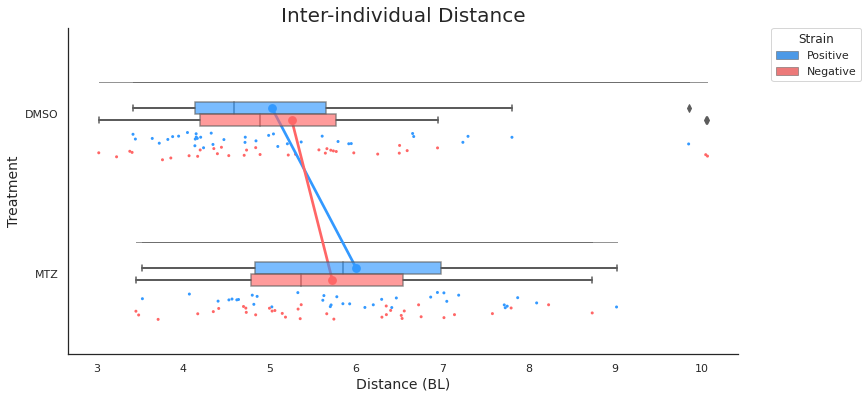

In [55]:
ort="h"; pal = ['#3399ff','#ff6666']; sigma = .2

f, ax = plt.subplots(figsize=(12, 6))

ax = pt.RainCloud(x = 'condition', y = 'data', data = df_distance, hue='Strain',palette = pal, bw = sigma, width_viol = 0,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)



plt.xlabel('Distance (BL)', fontsize=14)
plt.ylabel('Treatment', fontsize=14)
plt.title("Inter-individual Distance", fontsize =20)
sns.despine()
sns.set_style("white")

#### Statistics

The data input is the same as the data used to build the boxplot.

##### Normality check: Shapiro-Wilks

In [56]:
group_d = [d_dp, d_dn, d_mp, d_mn]
titles = ['DMSO Positive', 'DMSO Negative', 'MTZ Positive', 'MTZ Negative']

for d, title in zip(group_d, titles):    
    
    print(title)
    print('Overall IID:', stats.shapiro(d))

DMSO Positive
Overall IID: (0.8572643995285034, 0.00028097970061935484)
DMSO Negative
Overall IID: (0.8727884888648987, 0.001127402763813734)
MTZ Positive
Overall IID: (0.9767209887504578, 0.6505209803581238)
MTZ Negative
Overall IID: (0.9748410582542419, 0.5888615846633911)


###### Kruskal Wallis and Conover post hoc test

In [57]:
stats.kruskal(d_dp, d_dn, d_mp, d_mn)

KruskalResult(statistic=14.376982199027395, pvalue=0.0024344396947763303)

In [58]:
sp.posthoc_conover([d_dp, d_dn, d_mp, d_mn])

,1,2,3,4
1,-1.000000,0.457383,0.000676,0.007984
2,0.457383,-1.000000,0.008658,0.060346
3,0.000676,0.008658,-1.000000,0.435815
4,0.007984,0.060346,0.435815,-1.000000


Summary statistics:
- There seems to be no significant difference between dn and dp nor between mn and mp.
- There are significant differences between treatments as a general consequence of the drug.

### Alignment

Still need to do the polar plot.

#### Overall Alignment

In [59]:
def get_average_local_polarization(group, number_of_neighbours = 3):
    
    local_pol = []
    
    for tr in group:
    
        indices = ttsocial.give_indices(tr.s, number_of_neighbours) # Get the indices of the neighbours
        en = ttsocial.restrict(tr.e,indices)[...,1:,:] # Get the matrix with the vectors
        local_polarization = tt.norm(tt.collective.polarization(en)) # Get the polarization values

        lp = np.nanmean(local_polarization, axis = -1) # Get the mean polarization to get a number from 0 to 1 (max alignment)
        
        local_pol.append(lp)
    
    return local_pol


In [60]:
def reduce_frames(group):
    '''Reducing the frames to have data with the same size.'''
    
    new_frames = []
    
    for video in group:
        video = video[:35000]   # Data with the same size
        new_frames.append(video)
    
    return new_frames

In [61]:
# Local polarization for each condition

l_alignment_dp = get_average_local_polarization(dp)
l_alignment_dn = get_average_local_polarization(dn)
l_alignment_mp = get_average_local_polarization(mp)
l_alignment_mn = get_average_local_polarization(mn)

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/anaconda2/envs/trajectories_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning:

Mean of empty slice

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:38: RuntimeWarning:

invalid value encountered in true_divide

/home/renata/renata_project/trajectorytools/t

In [62]:
print(np.asarray(l_alignment_dp).shape)
print(np.asarray(l_alignment_dn).shape)
print(np.asarray(l_alignment_mp).shape)
print(np.asarray(l_alignment_mn).shape)

(36,)
(33,)
(35,)
(35,)


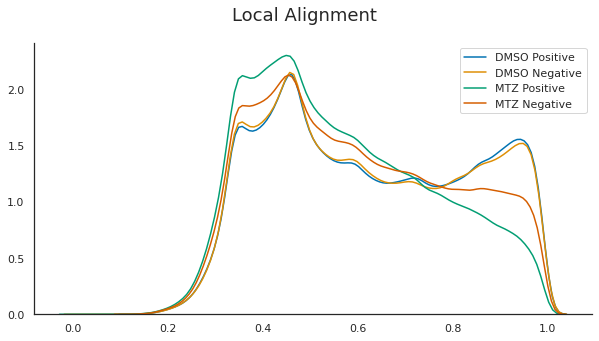

In [63]:
# Distribution of the all the videos pooled

fig=plt.figure(figsize=(10,5))

sns.kdeplot(np.concatenate(l_alignment_dp), label='DMSO Positive') # The format of the data just requires to stack the data from each video
sns.kdeplot(np.concatenate(l_alignment_dn),label='DMSO Negative')
sns.kdeplot(np.concatenate(l_alignment_mp),label='MTZ Positive')
sns.kdeplot(np.concatenate(l_alignment_mn),label='MTZ Negative')

plt.suptitle('Local Alignment', fontsize = 18)
sns.despine()

#### Analysis over time 

In [64]:
# Get the alignment in intervals of 5 minutes

pol_t1_dp, pol_t2_dp, pol_t3_dp, pol_t4_dp = time_blocks(l_alignment_dp)
pol_t1_dn, pol_t2_dn, pol_t3_dn, pol_t4_dn = time_blocks(l_alignment_dn)
pol_t1_mp, pol_t2_mp, pol_t3_mp, pol_t4_mp = time_blocks(l_alignment_mp)
pol_t1_mn, pol_t2_mn, pol_t3_mn, pol_t4_mn = time_blocks(l_alignment_mn)

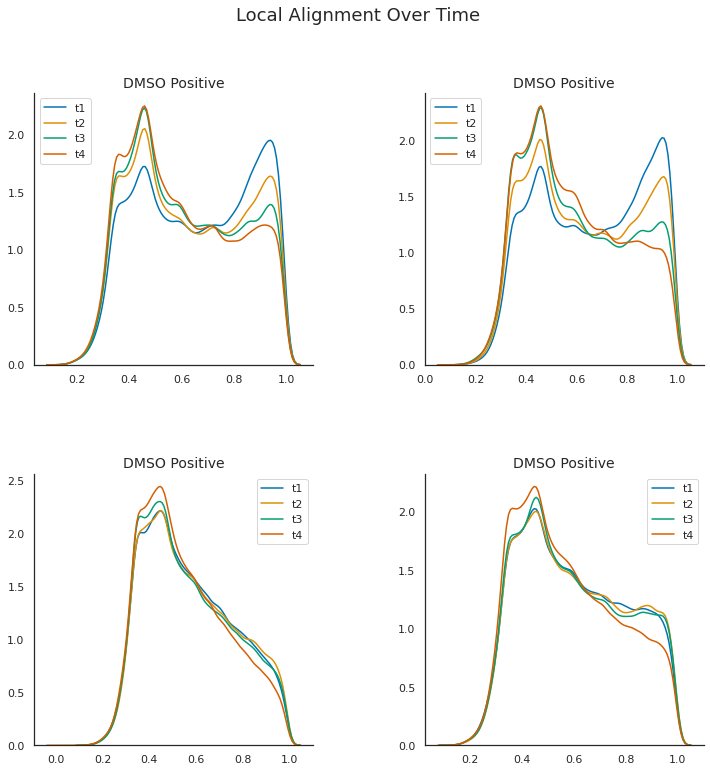

In [65]:
fig = plt.figure(figsize=(12,12))

fig.suptitle('Local Alignment Over Time', fontsize=18)


fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.kdeplot(np.concatenate(pol_t1_dp),label='t1')
sns.kdeplot(np.concatenate(pol_t2_dp),label='t2')
sns.kdeplot(np.concatenate(pol_t3_dp),label='t3')
sns.kdeplot(np.concatenate(pol_t4_dp),label='t4')
ax.set_title('DMSO Positive', fontsize=14)


ax = fig.add_subplot(2, 2, 2)
sns.kdeplot(np.concatenate(pol_t1_dn),label='t1')
sns.kdeplot(np.concatenate(pol_t2_dn),label='t2')
sns.kdeplot(np.concatenate(pol_t3_dn),label='t3')
sns.kdeplot(np.concatenate(pol_t4_dn),label='t4')
ax.set_title('DMSO Positive', fontsize=14)


ax = fig.add_subplot(2, 2, 3)
ax.set_title('DMSO Positive', fontsize=14)
sns.kdeplot(np.concatenate(pol_t1_mp),label='t1')
sns.kdeplot(np.concatenate(pol_t2_mp),label='t2')
sns.kdeplot(np.concatenate(pol_t3_mp),label='t3')
sns.kdeplot(np.concatenate(pol_t4_mp),label='t4')
ax.set_title('DMSO Positive', fontsize=14)


ax = fig.add_subplot(2, 2, 4)
sns.kdeplot(np.concatenate(pol_t1_mn),label='t1')
sns.kdeplot(np.concatenate(pol_t2_mn),label='t2')
sns.kdeplot(np.concatenate(pol_t3_mn),label='t3')
sns.kdeplot(np.concatenate(pol_t4_mn),label='t4')
ax.set_title('DMSO Positive', fontsize=14)

sns.despine()
plt.show()

#### Raincloud for ratio of alignment

In [66]:
def interval_ratio(group):
    '''Calculates the ratio of time spent in a high level of alignment over the whole video duration'''

    ratio_al = []
    
    for video in group:
        interval_values = []
        
        for value in video:
            if 0.7 <= value <= 1.0:
                interval_values.append(value)
        
        ratio_al.append(len(interval_values)/len(video))
    
    return np.asarray(ratio_al)

In [67]:
ratio_al_dp = interval_ratio(l_alignment_dp)
ratio_al_dn = interval_ratio(l_alignment_dn)
ratio_al_mp = interval_ratio(l_alignment_mp)
ratio_al_mn = interval_ratio(l_alignment_mn)

In [68]:
condition = np.concatenate([['DMSO']*ratio_al_dp.shape[0],['DMSO']*ratio_al_dn.shape[0],['MTZ']*ratio_al_mp.shape[0],['MTZ']*ratio_al_mn.shape[0]])
strain = np.concatenate([['Positive']*ratio_al_dp.shape[0], ['Negative']*ratio_al_dn.shape[0],['Positive']*ratio_al_mp.shape[0],['Negative']*ratio_al_mn.shape[0]])

In [69]:
y_data = np.concatenate((ratio_al_dp, ratio_al_dn, ratio_al_mp, ratio_al_mn))

ratio_dict = {'condition':condition,
    'Strain':strain,
    'data':y_data}

df_ratio = pd.DataFrame(data=ratio_dict)

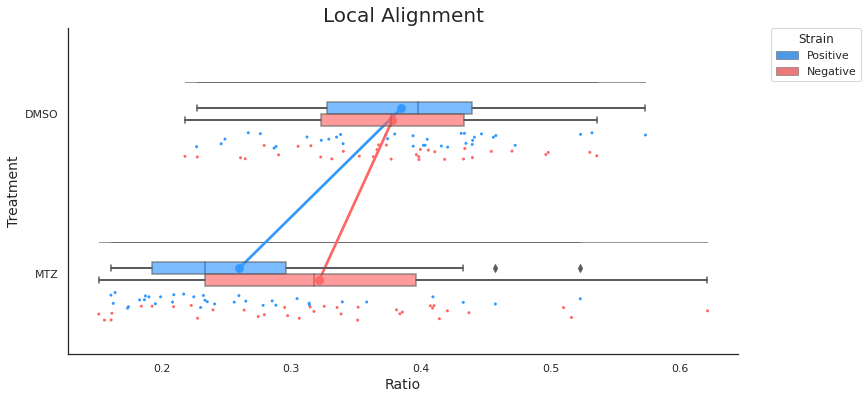

In [70]:
ort="h"; pal = ['#3399ff','#ff6666']; sigma = .2

f, ax = plt.subplots(figsize=(12, 6))

ax = pt.RainCloud(x = 'condition', y = 'data', data = df_ratio, hue='Strain',palette = pal, bw = sigma, width_viol = 0,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)



plt.xlabel('Ratio', fontsize=14)
plt.ylabel('Treatment', fontsize=14)
plt.title("Local Alignment", fontsize =20)
sns.despine()
sns.set_style("white")

###### Kruskal Wallis and Conover post-hoc test

In [71]:
stats.kruskal(ratio_al_dp, ratio_al_dn,ratio_al_mp, ratio_al_mn)

KruskalResult(statistic=34.6683664571126, pvalue=1.4315016505696254e-07)

In [72]:
sp.posthoc_conover([ratio_al_dp, ratio_al_dn, ratio_al_mp, ratio_al_mn])

,1,2,3,4
1,-1.000000e+00,6.902121e-01,2.030702e-08,0.001927
2,6.902121e-01,-1.000000e+00,2.439597e-07,0.007864
3,2.030702e-08,2.439597e-07,-1.000000e+00,0.006179
4,1.926634e-03,7.864124e-03,6.179011e-03,-1.000000


Summary Statistics:
- There seems to be no sig. difference between strain;

- There is a sig. decrease in the percentage of time the fish spent aligned on both groups treated with mtz;

- The decrease seems to be related with the ablation since the ablated group has a percentage of alignment sig. lower compared to the mtz negative group.

#### Correlation: speed vs. alignment AND Statistics

In [73]:
## Data for the group speed

def group_speed(trajectories):
    
    ''' This function consideres the group in each video and calculates the median speed of the group.
    The output is 1D an array with (number_of_videos * number_of_frames) elements.'''

    group_speed = []
    
    for tr in trajectories:
        med_speed = np.nanmedian(tr.speed[:35000], axis=1) 
        group_speed.append(med_speed)

        
    return np.asarray(group_speed)

dp_speed=group_speed(dp)
print(np.shape(dp_speed))
dn_speed=group_speed(dn)
print(np.shape(dn_speed))
mp_speed=group_speed(mp)
print(np.shape(mp_speed))
mn_speed=group_speed(mn)
print(np.shape(mn_speed))

(36, 35000)
(33, 35000)
(35, 35000)
(35, 35000)


In [74]:
def df_group(group, group_name, group_speed, group_al):
    
    df_dict = {}
    number_of_frames = range(35000)
    
    for video in range(len(group)):
        
        df_dict.setdefault('Group', [])
        df_dict.setdefault('Speed', [])
        df_dict.setdefault('Alignment', [])
        #df_dict.setdefault('Video', [])
            
        df_dict['Group'].append(group_name)
        df_dict['Speed'].append(np.nanmedian(group_speed[video]))
        df_dict['Alignment'].append(group_al[video])
        #df_dict['Video'].append(video)

    
    return df_dict

In [75]:
df1_dp_dict = df_group(dp, 'DMSO Positive', dp_speed, ratio_al_dp)
df2_dn_dict = df_group(dn, 'DMSO Negative', dn_speed, ratio_al_dn)
df3_mp_dict = df_group(mp, 'MTZ Positive', mp_speed, ratio_al_mp)
df4_mn_dict = df_group(mn, 'MTZ Negative', mn_speed, ratio_al_mn)

In [76]:
df1_dp = pd.DataFrame(data=df1_dp_dict)
df2_dn = pd.DataFrame(data=df2_dn_dict)
df3_mp = pd.DataFrame(data=df3_mp_dict)
df4_mn = pd.DataFrame(data=df4_mn_dict)

In [77]:
data_group = pd.concat([df1_dp,df2_dn,df3_mp,df4_mn])

In [78]:
print(data_group.head())
print(data_group.tail())

           Group     Speed  Alignment
0  DMSO Positive  2.380628   0.439686
1  DMSO Positive  3.091269   0.433670
2  DMSO Positive  5.528561   0.431143
3  DMSO Positive  2.543766   0.415905
4  DMSO Positive  4.255860   0.379893
           Group     Speed  Alignment
30  MTZ Negative  2.013295   0.516171
31  MTZ Negative  2.745453   0.437102
32  MTZ Negative  2.083255   0.306367
33  MTZ Negative  1.364776   0.239782
34  MTZ Negative  1.537135   0.621074


In [79]:
import pingouin as pg

pg.corr(x=df1_dp['Alignment'], y=df1_dp['Speed'], method ='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,36,0.518404,"[0.23, 0.72]",0.268743,0.224424,0.0012,0.915766


/home/renata/anaconda2/envs/trajectories_analysis/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.6.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [80]:
pg.corr(x=df2_dn['Alignment'], y=df2_dn['Speed'], method ='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,33,0.453543,"[0.13, 0.69]",0.205701,0.152748,0.008028,0.774582


In [81]:
pg.corr(x=df3_mp['Alignment'], y=df3_mp['Speed'], method ='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,35,0.634174,"[0.38, 0.8]",0.402176,0.364812,0.000043,0.989894


In [82]:
pg.corr(x=df4_mn['Alignment'], y=df4_mn['Speed'], method ='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,35,0.487395,"[0.18, 0.71]",0.237554,0.189901,0.002981,0.862106


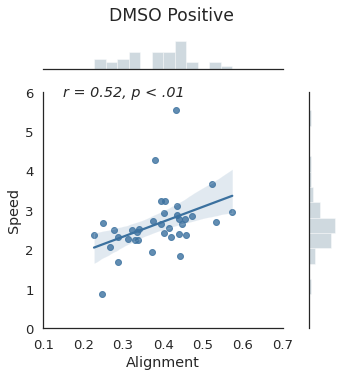

In [83]:
sns.set(style='white', font_scale=1.2)



h = sns.JointGrid(data=df1_dp, x='Alignment', y='Speed', xlim=(0.1, 0.7), ylim=(0, 6), height=5)
h = h.plot_joint(sns.regplot, color="xkcd:muted blue")
h = h.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
h.ax_joint.text(0.15,5.9, 'r = 0.52, p < .01', fontstyle='italic')
plt.suptitle('DMSO Positive', y=1.05)

plt.tight_layout()

Text(0.5, 1.05, 'DMSO Negative')

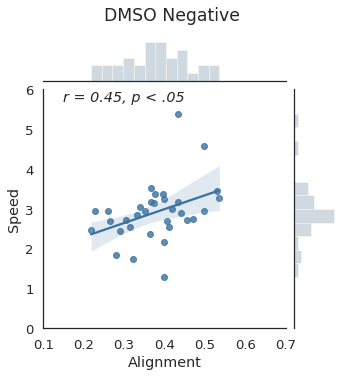

In [84]:

g = sns.JointGrid(data=df2_dn, x='Alignment', y='Speed', xlim=(0.1, 0.7), ylim=(0, 6), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(0.15,5.7, 'r = 0.45, p < .05', fontstyle='italic')
plt.suptitle('DMSO Negative', y=1.05)


Text(0.5, 1.05, 'MTZ Positive')

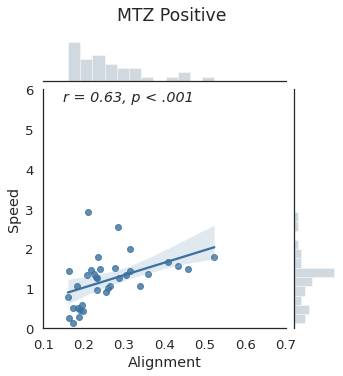

In [85]:
j = sns.JointGrid(data=df3_mp, x='Alignment', y='Speed', xlim=(0.1, 0.7), ylim=(0, 6), height=5)
j = j.plot_joint(sns.regplot, color="xkcd:muted blue")
j = j.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
j.ax_joint.text(0.15,5.7, 'r = 0.63, p < .001', fontstyle='italic')
plt.suptitle('MTZ Positive',y=1.05)

Text(0.5, 1.05, 'MTZ Negative')

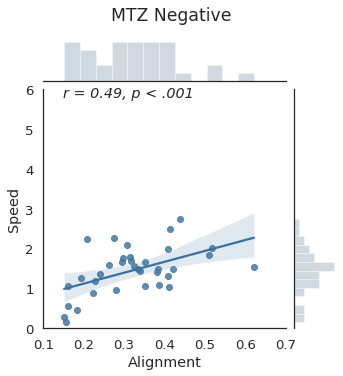

In [86]:
f = sns.JointGrid(data=df4_mn, x='Alignment', y='Speed', xlim=(0.1, 0.7), ylim=(0, 6), height=5)
f = f.plot_joint(sns.regplot, color="xkcd:muted blue")
f = f.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
f.ax_joint.text(0.15,5.8, 'r = 0.49, p < .001', fontstyle='italic')
plt.suptitle('MTZ Negative', y=1.05)

The data input is the same as the data used to build the boxplot.

In [87]:
print('DP', stats.shapiro(ratio_al_dp))
print('DN', stats.shapiro(ratio_al_dn))
print('MP', stats.shapiro(ratio_al_mp))
print('MN', stats.shapiro(ratio_al_mn))

DP (0.9749479293823242, 0.5750079154968262)
DN (0.9840893149375916, 0.897855818271637)
MP (0.8756898641586304, 0.0009347751038148999)
MN (0.9654931426048279, 0.33181777596473694)


### Structure of Trajectories

In this section, I'll explore how different the overall structures of the trajectories for each group are.
- Separate the trajectories and see how different: Linear Discriminant Analysis (LDA)

##### LDA with speed and curvature

In [88]:
def split_trajectory(t, window = 300):
    split_t = []
    
    for i in range(0, t.shape[0], window):
        split_t.append(np.reshape(t[i : i + window], (-1,1)))
    split_t = split_t[:-1]
    return np.squeeze(np.asarray(split_t))
    

def df(group, label):
    
    labels = []
    data = []
    
    for tr in group:
        for fish in range(tr.number_of_individuals):

            s = tr.speed[:, fish]
            c = tr.curvature[:, fish]
            features = np.concatenate([s,c])
            features = features[~np.isnan(features)]
            d = split_trajectory(features, window=2000)
        
            data.append(d)
            labels.append([label for i in range(d.shape[0])])
       

    return np.concatenate(data), np.concatenate(labels)

In [89]:
data0, labels0 = df(dp, 0)
data1, labels1 = df(dn, 1)
data2, labels2 = df(mp, 2)
data3, labels3 = df(mn, 3)
label_text = ['DMSO Positive','DMSO Negative','MTZ Positive','MTZ Negative']

X = np.concatenate([data0, data1, data2, data3])
y = np.concatenate([labels0, labels1, labels2, labels3])

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:45: RuntimeWarning:

divide by zero encountered in true_divide

/home/renata/renata_project/trajectorytools/trajectorytools/geometry.py:45: RuntimeWarning:

invalid value encountered in true_divide



In [90]:
data0, labels0 = df(dp, 0)
data0 = np.random.permutation(data0)

data1, labels1 = df(dn, 1)
data1 = np.random.permutation(data1)

data2, labels2 = df(mp, 2)
data2 = np.random.permutation(data2)

data3, labels3 = df(mn, 3)
data3 = np.random.permutation(data3)

label_text = ['DMSO Positive','DMSO Negative','MTZ Positive','MTZ Negative']

X = np.concatenate([data0, data1, data2, data3])
y = np.concatenate([labels0, labels1, labels2, labels3])

Xtest = X[:2000]
ytest = y[:2000]
Xtrain = X[2000:] 
ytrain = y[2000:]

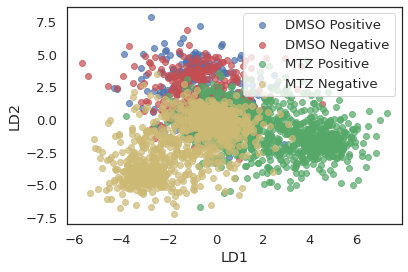

0.3501762114537445 0.0155


In [91]:

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(Xtrain, ytrain) # X: tr.s[frames,fish,coordinates]; y: [dp,dn,mp,mn]

plt.figure()


plt.xlabel('LD1')
plt.ylabel('LD2')

colors = ['b', 'r', 'g', 'y']

if X_lda.shape[1] == 1:
    for i in np.unique(y):
        plt.scatter(X_lda[ytrain == i],np.ones_like(X_lda[ytrain == i])*i,c=colors[i],cmap='rainbow',alpha=0.7)
        
else:
    for i in np.unique(y):
        plt.scatter(X_lda[ytrain == i,0],X_lda[ytrain==i,1],c=colors[i],cmap='rainbow',alpha=0.7, label=label_text[i])
        

plt.legend()

plt.show()

strain = lda.score(Xtrain, ytrain)
stest = lda.score(Xtest, ytest)

print(strain, stest)